<a class="anchor" id="0"></a>
# MNIST - Deep Neural Network with Keras

In [14]:
!pip install keras
!pip install tensorflow

In [92]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop




# 3. MNIST dataset <a class="anchor" id="3"></a>




- MNIST is a collection of handwritten digits ranging from the number 0 to 9. 

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels. 



In [95]:
# import dataset
from keras.datasets import mnist

# load dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))



Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# 4. Data visualization <a class="anchor" id="4"></a>




- The following code will help to sample the 25 random MNIST digits and visualize them.

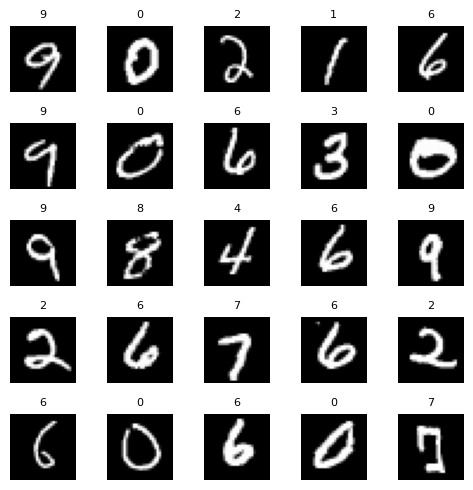

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 25 mnist digits from the train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# Plot the 25 mnist digits
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"{labels[i]}", fontsize=8)  # added labels for each image as a title

plt.tight_layout()
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


# 5. Designing model architecture <a class="anchor" id="5"></a>






---





## 5.1 Import Keras layers <a class="anchor" id="5.1"></a>

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

## 5.2 Compute the number of labels <a class="anchor" id="5.2"></a>



In [105]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [107]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 5.4 Data Preprocessing <a class="anchor" id="5.4"></a>




In [110]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [112]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32')/255

In [113]:
x_train.shape

(60000, 784)

In [116]:
x_test.shape

(10000, 784)

## 5.5 Setting network parameters <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [119]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

## 5.6 Designing the model architecture <a class="anchor" id="5.6"></a>




In [122]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, activation='relu', input_dim=input_size))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))


        

## 5.7 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [125]:
# View Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960. 
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792. 
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570. 
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

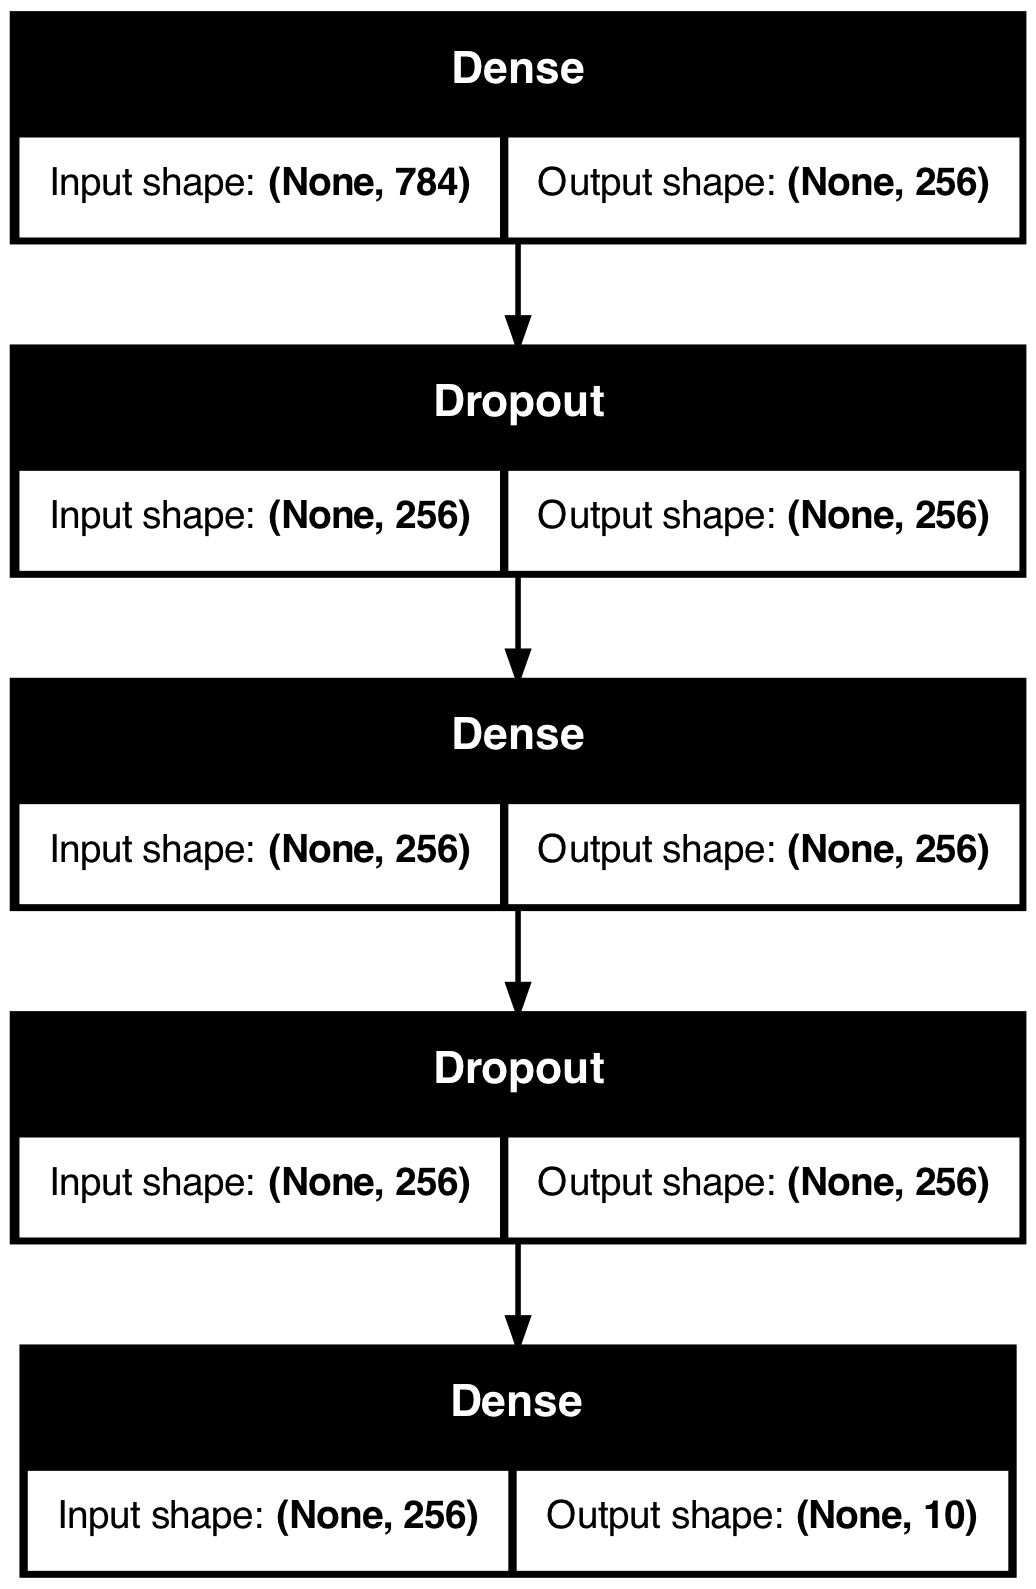

In [128]:
# Plot the model
plot_model(model, to_file='mlp-mnis.png', show_shapes=True)

# 6. Implement MLP model using Keras <a class="anchor" id="6"></a>



## 6.1 Compile the model with compile() method <a class="anchor" id="6.1"></a>


In [131]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

## 6.2 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [135]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7662 - loss: 0.7184
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9381 - loss: 0.2109
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1559
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9618 - loss: 0.1308
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1118
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1014
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0864
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0881
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0831
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0735
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0680
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## 6.3 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [137]:
loss, acc = model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9788 - loss: 0.0732  

Test accuracy: 98.2%
